In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from rpeakdetect import detect_beats


In [2]:
# loading values to a ecg array 

mat = scipy.io.loadmat('A00008.mat')
ecg = mat.get('val')


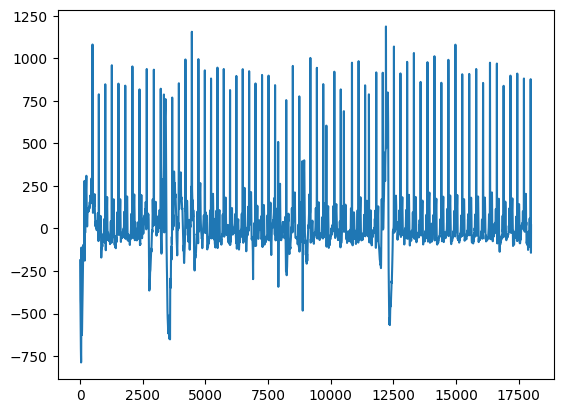

In [3]:
# original ECG
# jisko 4 ways sy normalize karna hai 
# 1. Scale to range
# 2. clipping
# 3. log  scaling 
# 4. z-score
plt.plot(ecg[0])

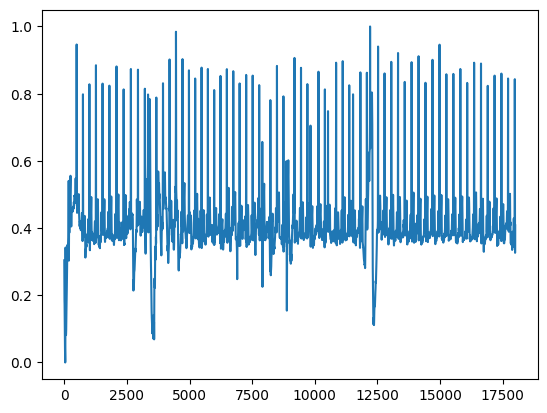

In [4]:
# first method of normalization i.e scaling to a range method using formula x' =  (X - Xmin)/(Xmax - Xmin)
# converting foating-point feature values from the natural range (for example, 100 to 900) into a standard range 

mini = np.min(ecg[0]) # minimum value dega i.e -788
maxi = np.max(ecg[0])  # maximum value dega i.e 1188
scaled_ecg = (ecg[0]-mini)/(maxi-mini)
plt.plot(scaled_ecg)

In [5]:
# Feature clliping method 

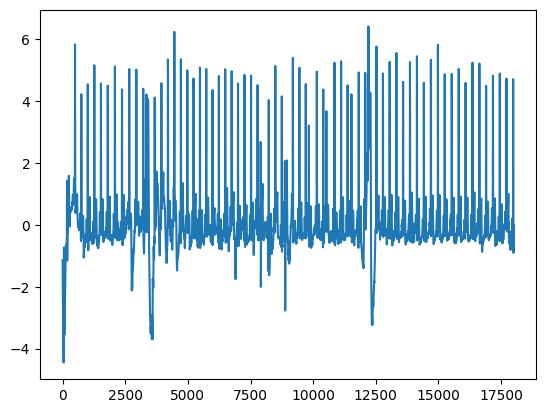

In [6]:
# 2. z score method 
# formula 
# z_score = (ecg[0]-mean)/sd

mean = np.mean(ecg[0]) # mean = 21.97
# print(mean)
sd = np.std(ecg[0])
z_score = (ecg[0]-mean)/sd 
plt.plot(z_score)

C:\Users\Yadav's\AppData\Local\Temp\ipykernel_10084\4234826468.py:5: RuntimeWarning: divide by zero encountered in log
  log_scale = np.log(ecg[0])
C:\Users\Yadav's\AppData\Local\Temp\ipykernel_10084\4234826468.py:5: RuntimeWarning: invalid value encountered in log
  log_scale = np.log(ecg[0])


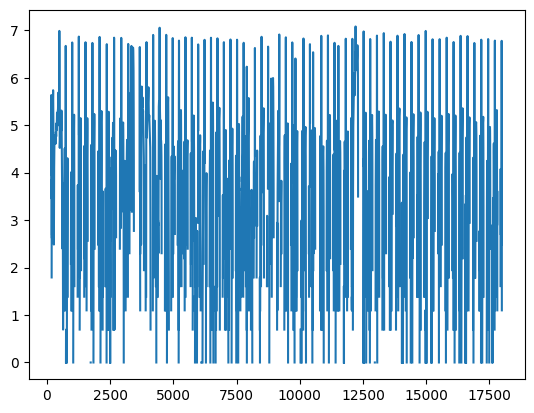

In [7]:
# 3. log scaling method 
# formula 
# X' = log(x)

log_scale = np.log(ecg[0])
plt.plot(log_scale)

In [8]:
rpeaks = detect_beats(ecg[0],300)  #sampling frequency 300hz
rpeaks    # this is showing the location of each r peaks

c:\Users\Yadav's\Desktop\DSP TUTORIAL\rpeakdetect.py:76: RuntimeWarning: divide by zero encountered in log
  shannon_energy = -square_decg_power*np.log(square_decg_power)
c:\Users\Yadav's\Desktop\DSP TUTORIAL\rpeakdetect.py:76: RuntimeWarning: invalid value encountered in multiply
  shannon_energy = -square_decg_power*np.log(square_decg_power)


array([   43,   174,   491,   744,  1000,  1261,  1526,  1799,  2084,
        2367,  2656,  2939,  3215,  3347,  3672,  3939,  4201,  4458,
        4718,  4974,  5223,  5478,  5730,  5981,  6233,  6488,  6743,
        6997,  7258,  7519,  7779,  7903,  8225,  8487,  8746,  8874,
        9187,  9447,  9702,  9827, 10144, 10401, 10525, 10848, 11112,
       11373, 11525, 11817, 12078, 12205, 12523, 12783, 13051, 13319,
       13587, 13862, 14139, 14415, 14696, 14977, 15249, 15529, 15807,
       16081, 16357, 16632, 16901, 17174, 17446, 17712], dtype=int64)

In [9]:
np.diff(rpeaks)   # it is distance between consecutive r peaks.

array([131, 317, 253, 256, 261, 265, 273, 285, 283, 289, 283, 276, 132,
       325, 267, 262, 257, 260, 256, 249, 255, 252, 251, 252, 255, 255,
       254, 261, 261, 260, 124, 322, 262, 259, 128, 313, 260, 255, 125,
       317, 257, 124, 323, 264, 261, 152, 292, 261, 127, 318, 260, 268,
       268, 268, 275, 277, 276, 281, 281, 272, 280, 278, 274, 276, 275,
       269, 273, 272, 266], dtype=int64)

ValueError: could not broadcast input array from shape (18000,) into shape (70,)

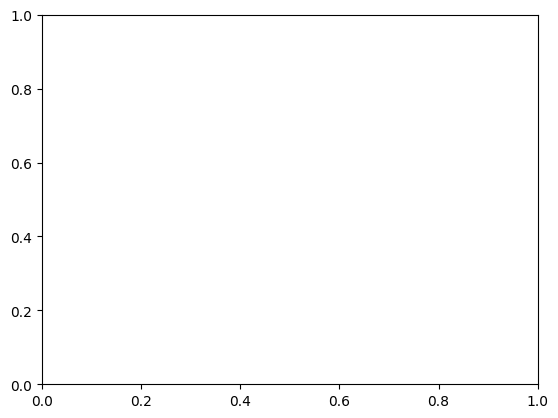

In [10]:
plt.stem(rpeaks,ecg)
# plt.plot(rpeaks)